<a href="https://colab.research.google.com/github/gLima02/aula01-AI-ENGENEERING/blob/main/material/aulas/PDI/lab01/IntroPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Conhecer o que é uma imagem digital
*   Conhecer como fazer leitura e exibição de imagens
*   conhecer algumas propriedades de imagens
*   conhecer canais de cores de imagens


## Representação e visualização de imagem

Uma imagem digital nada mais é que uma uma matriz de linhas e colunas, onde cada posição desta matriz contem o valor de um *pixel*.

O valor de cada pixel representa a intensidade de cor naquele ponto especifico.


In [2]:
# Importando a biblioteca OpenCV
import cv2

#import a biblioteca Numpy8 bits
import numpy as np

#linha magica para imprimir graficos no notebook
%matplotlib inline
from matplotlib import pyplot as plt


print ("OpenCV Versão : %s " % cv2.__version__)

OpenCV Versão : 4.11.0 


## Dica para quem está utilizando o google colab

Por ser uma instância que é alocada temporariamente precisamos carregar as imagens neste seção.

Está etapa pode ser feita de forma manual, fazendo o upload das imagens.

Outra forma é fazer o download da imagem para o notebook, lempre-se que é um linux rodando! :) da uma olhada no exemplo abaixo.

In [3]:
# Para facilitar o download das imagens utilizadas neste notebook

!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/NATUREZA_1.jpg" /content # este link é o local onde a imagem está salva
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/img3x3.png" /content


--2025-02-14 00:47:27--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/NATUREZA_1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233789 (228K) [image/jpeg]
Saving to: ‘NATUREZA_1.jpg’

NATUREZA_1.jpg      100%[===================>] 228.31K  --.-KB/s    in 0.04s   

2025-02-14 00:47:27 (6.15 MB/s) - ‘NATUREZA_1.jpg’ saved [233789/233789]

/content: Scheme missing.
FINISHED --2025-02-14 00:47:27--
Total wall clock time: 0.2s
Downloaded: 1 files, 228K in 0.04s (6.15 MB/s)
--2025-02-14 00:47:27--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/img3x3.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.

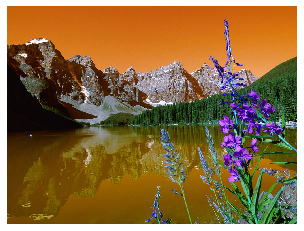

In [ ]:
# para nao imprimir os eixos
image = cv2.imread("NATUREZA_1.jpg")

plt.imshow(image,interpolation="none")
plt.axis('off')
plt.show()

A imagem colorida possui três dimensões: as linhas e as colunas da matriz, bem como os canais da imagem. Uma imagem colorida geralmente possui três canais: R (Red - vermelho) G (Green - verde) B (Blue - azul)

Mas porque a imagem é mostrada de modo estranho pelo pacote matplotlib? Porque a OpenCV representa os canais da imagem na ordem B - G - R, e não R - G - B como é esperado pela maior parte das bibliotecas.

Assim, para podermos visualizar corretamente uma imagem do OpenCV com matplotlib, precisamos inverter os canais, como no código abaixo:


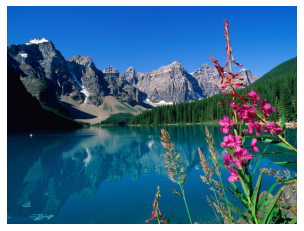

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis('off')
plt.show()

In [ ]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: ", image_rgb.shape)
print("Quantidade de linhas: ", image_rgb.shape[0])
print("Quantidade de colunas: ", image_rgb.shape[1])
print("Camadas de cores: ", image_rgb.shape[2])

Dimensões da imagem:  (768, 1024, 3)
Quantidade de linhas:  768
Quantidade de colunas:  1024
Camadas de cores:  3


In [ ]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: \n", image_rgb)


Dimensões da imagem: 
 [[[ 10  92 194]
  [ 12  94 196]
  [ 12  95 197]
  ...
  [  6  98 201]
  [  5  97 200]
  [  2  95 198]]

 [[ 11  93 195]
  [ 11  94 196]
  [ 11  94 196]
  ...
  [  6  98 201]
  [  6  98 201]
  [  4  97 200]]

 [[ 11  94 196]
  [ 11  94 196]
  [  9  95 196]
  ...
  [  5  97 200]
  [  7  99 202]
  [  7 100 203]]

 ...

 [[  0  69 111]
  [  1  70 112]
  [  1  70 112]
  ...
  [ 11  31   6]
  [ 17  41  17]
  [  6  34   9]]

 [[  0  67 109]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 65 105  68]
  [ 86 135  90]
  [ 82 136  86]]

 [[  0  66 108]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 53 109  62]
  [ 72 138  77]
  [ 74 145  77]]]


A matriz acima é a representação da imagem de forma numérica, é o valor de cada pixel da imagem. Com esta imagem fica complicado. Vamos tentar analisar separando os canais de cores de um pixel específico.

In [ ]:
(b, g, r) = image[450, 50]
print('O pixel (50, 50) tem as seguintes cores:')
print('Vermelho:',r, 'Verde:', g, 'Azul:', b)

O pixel (50, 50) tem as seguintes cores:
Vermelho: 2 Verde: 14 Azul: 36


## Desafio 1
Abra a imagem "**img3x3.png**" e plote suas componentes externas (shape) e internas (matriz).

Como você esta relacionado as possições da matriz com os pixels da imagem??


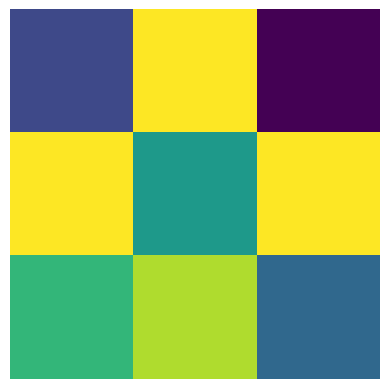

array([[ 79, 255,  29],
       [255, 150, 255],
       [179, 228, 105]], dtype=uint8)

In [5]:
# implemente aqui o seu código.





## Imagem em tons de cinza

Em muitos casos trabalhamos com imagens na escala de cinza, logo, a imagem possui apenas 1 canal de cor.

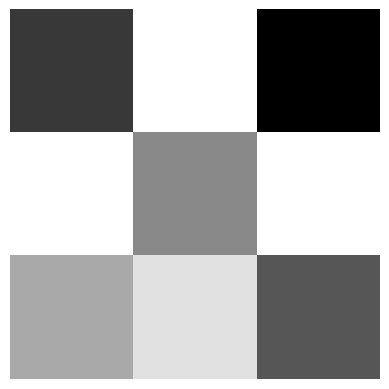

array([[ 79, 255,  29],
       [255, 150, 255],
       [179, 228, 105]], dtype=uint8)

In [8]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("img3x3.png", 0)

# ou use o argumento 0, tem o mesmo efeito de importar na escala de cinza
#imagem_cinza = cv2.imread("img3x3.png", 0)


plt.imshow(imagem_cinza, cmap="gray")

plt.axis('off')
plt.show()
imagem_cinza

## Desafio 2

Eita! alguma está errada nesse plot, era esperado uma imagem na escala de cinza. Por que apareceu isso, como corrigir?

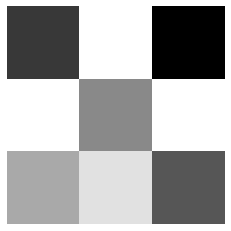

array([[ 79, 255,  29],
       [255, 150, 255],
       [179, 228, 105]], dtype=uint8)

In [ ]:
# Coloque aqui sua solução.
import cv2
import numpy as np

from matplotlib import pyplot as plt


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("img3x3.png", 0)

plt.imshow(imagem_cinza, cmap='gray')

plt.axis('off')
plt.show()
imagem_cinza


## Amostragem da imagem

As imagens capturadas por dispositivos digitais possuem as características de resolução espacial e resolução de cores
Enquanto a resolução de cores afeta o número de cores que podem serr epresentadas na imagem, sua resolução espacial afeta o tamanho que a imagem irá ter. Embora não se possa comparar diretamente a resolução de duas imagens com tamanhos diferentes, a imagem do mesmo objeto, se possui mais pixels, significará que tamém possui maior resolução

### Alterando o tamanho de uma imagem

O redimensionamento da imagem pode ser feito na OpenCV através do comando `cv2.resize(imagem, tamanho, interpolação)`

O tamanho é dado por uma tupla (W,H), onde W é a largura (número de colunas) e H é a altura (número de linhas)

Dimensões da imagem:  (768, 1024, 3)
Novas dimensões da imagem:  (400, 600, 3)


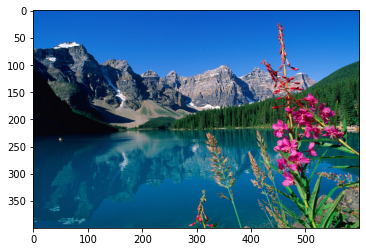

In [ ]:
# Carregando a imagem na versão colorida de um arquivo
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread("NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print("Dimensões da imagem: ", image.shape)


imagem2 = cv2.resize(image, (600,400), cv2.INTER_LINEAR)
print("Novas dimensões da imagem: ", imagem2.shape)


plt.imshow(imagem2)
plt.show()

## Desafio 3

Comparar os diferentes métodos de interpolação (vizinho mais próximo, bilinear e bicúbica) ao ampliarmos uma imagem em 10 vezes seu tamanho. Escolha uma imagem pequena.  

Dica de onde encontrar na documentação as flags de interpolação:
https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

Para saber mais sobre interpolação, sugiro assistir ao video: https://www.youtube.com/watch?v=8bTDssnJyZc&ab_channel=S.M.RiazulIslam

In [ ]:
#Implemente aqui sua solução............












# Dica para imprimir varias imagens de forma mais organizada com o matplotlib

#plt.figure(figsize = (20,20))
#plt.subplot(1, 2, 1);plt.imshow(img)
#plt.subplot(1, 2, 2);plt.imshow(img2)
#plt.show()

## Alterando os valores dos pixels de uma imagem

### Range de valores

Antes de alterar os valores dos pixels temos que entender que a OpenCV trabalha com valores de 8 bits para cada componente de cor ou escala de cinza, quer dizer que os valores possiveis estão no range entre **0** e **2⁸-1**, que é a mesma que dizer entre **0 e 255**.

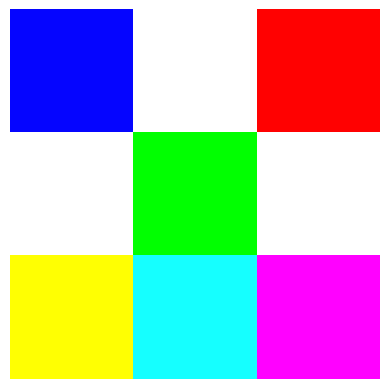

In [9]:
import cv2
import numpy as np


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("img3x3.png", cv2.IMREAD_COLOR)

plt.imshow(imagem_cinza)

plt.axis('off')
plt.show()

## Desafio 4

Implemente um codigo que faz a alteração do pixel(0,0) para a a cor Magenta - RGB (255,0,255);

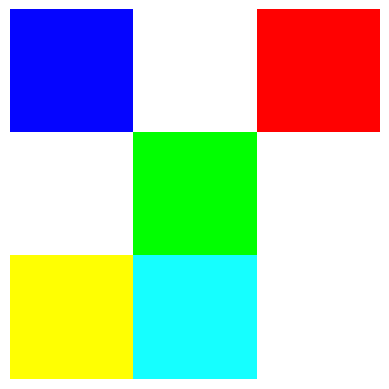

In [18]:
# implemente aqui sua solução....

import cv2
import numpy as np


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("img3x3.png", cv2.IMREAD_COLOR)

imagem_cinza[2, 2] = (255, 255, 255) # mudando o valor de um pixel

plt.imshow(imagem_cinza)

plt.axis('off')
plt.show()








## Desafio 5

![](https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab01/letra.png?raw=1)

Crie uma array de zero com 8 linhas e 5 colunas. E escreva (desenhe) a primeira letra do seu nome ou grupo.

Plot a imagem para visualizar o resultado.

Dica: Use np.zeros() para criar o array, para facilitar faça em escala de cinza onde o valor de intensidade do pixel 0=branco e 255=preto.

[[  0 255 255 255   0]
 [255   0   0   0   0]
 [255   0   0   0   0]
 [255   0 255 255   0]
 [255   0   0   0 255]
 [  0 255 255 255   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


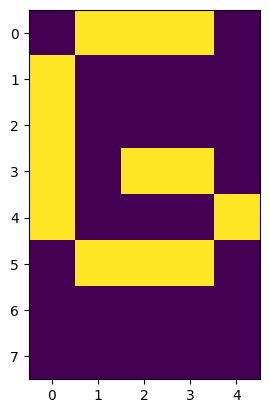

In [63]:
# Começamos importanto as bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Criamos o array de zero 3x3
letra = np.zeros((8,5), dtype=int)

# implemente aqui o seu código.........



letra[0, 1] = 255
letra[0, 2] = 255
letra[0, 3] = 255

letra[1, 0] = 255
letra[2, 0] = 255
letra[3, 0] = 255
letra[4, 0] = 255
letra[5, 1] = 255
letra[5, 2] = 255
letra[5, 3] = 255
letra[4, 4] = 255
letra[3, 3] = 255
letra[3, 2] = 255
# Plota resultado

plt.imshow(letra)

print(letra)

## Varredura de uma imagem

Desenvolver uma rotina capaz de varrer sua imagem pixel a pixel é muito mais interessante para aplicações mais práticas, embora exista tecnicas mais otimizadas e rápidas para essa aplicação, podemos utilizar uma estrutura de dois laços For para passar sobre todas as linhas e todas as colunas da matriz (imagem).

(768, 1024, 3)


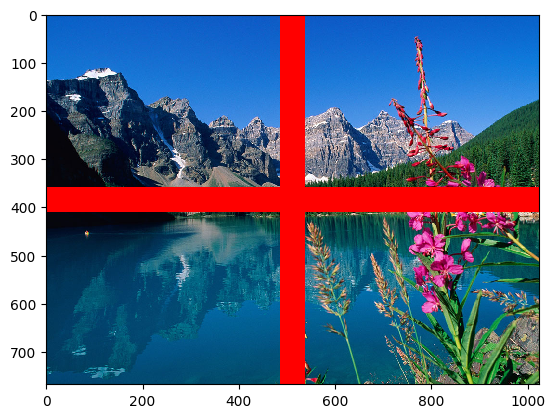

In [12]:
import cv2
imagem = cv2.imread("NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#image = cv2.resize(image, (50,50), cv2.INTER_LINEAR)
print(image.shape)
largura = image.shape[1]
altura = image.shape[0]

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    if (largura//2 - 25/100 * 100 <= x <= largura//2 + 25/100 * 100):
      image[y, x] = (255,0,0)

    if(altura//2 - 25/100 * 100 <= y <= altura//2 + 25/100 * 100):
      image[y, x] = (255,0,0)
plt.imshow(image, interpolation="none")

plt.show()

## Desafio 6

Utilizando a técnica dos 2 for, implemente uma função que desenha um linha branca na vertical no centro da imagem de largura 50 pixeis.
Dica: use um if para checar a posição (x,y) antes de pintar de branco o pixel.

In [ ]:
### seu código aqui